# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [2]:
df = pd.read_csv('new.csv')
df.fillna(df.mean(), inplace=True)
print(df.head())
# TODO: Load the Dataset and Check for mising values and then impute them with the mean value

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  


Get a brief description of the dataset

In [3]:
# TODO: you can use .info() and .description()
print(f'info: {df.info()}')
print(f'description: {df.describe()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
info: None
description:              CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std   

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [4]:
features = ["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","TAX","PTRATIO"]
X = df[features]
y = df["MEDV"]
print(X.to_numpy())

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 4.0900e+00 2.9600e+02 1.5300e+01]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 4.9671e+00 2.4200e+02 1.7800e+01]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 4.9671e+00 2.4200e+02 1.7800e+01]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1675e+00 2.7300e+02 2.1000e+01]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.3889e+00 2.7300e+02 2.1000e+01]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.5050e+00 2.7300e+02 2.1000e+01]]


look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

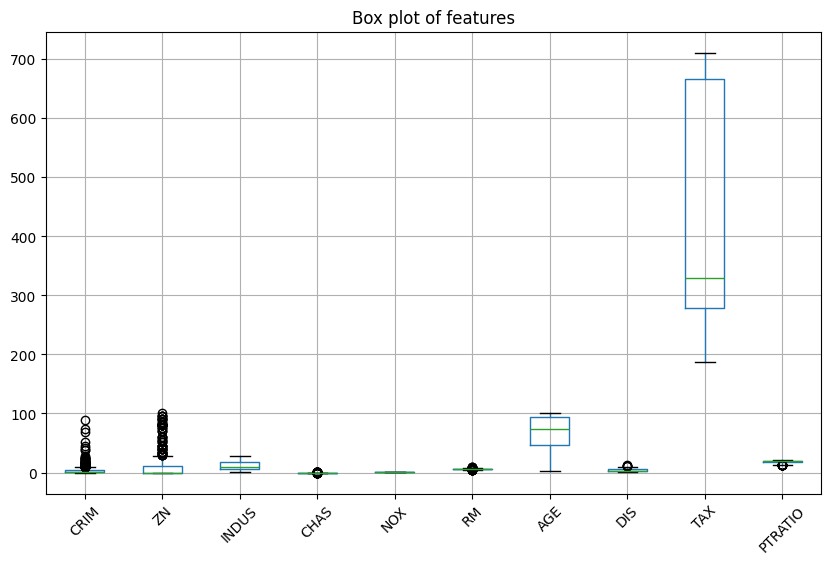

In [5]:
plt.figure(figsize=(10, 6))
X.boxplot()
plt.title('Box plot of features')
plt.xticks(rotation=45)
plt.show()

<Axes: >

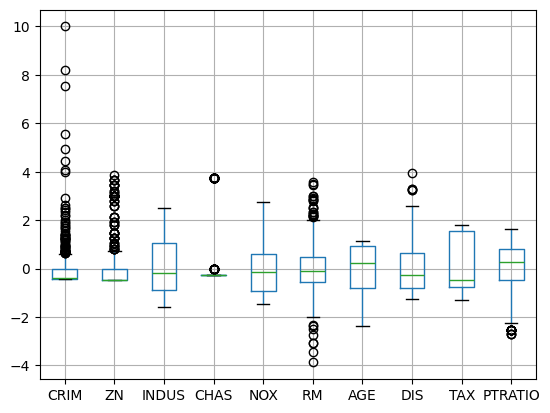

In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=features)
X.boxplot()

add polynomial features to increase model complexity!

In [7]:
poly_features = PolynomialFeatures(2)
poly_features.fit(X, y)
X = poly_features.transform(X)

Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [8]:
y = y.to_numpy()



Split the dataset into two parts such that the training set contains 80% of the samples.

In [9]:
print(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X)
print(X_train)
print(X)

[[ 1.         -0.42232846  0.29644292 ...  0.4443665   0.97258163
   2.12868211]
 [ 1.         -0.41986984 -0.48963852 ...  0.97481951  0.29925379
   0.09186606]
 [ 1.         -0.41987219 -0.48963852 ...  0.97481951  0.29925379
   0.09186606]
 ...
 [ 1.         -0.41595175 -0.48963852 ...  0.64514906 -0.94495114
   1.38407185]
 [ 1.         -0.41023216 -0.48963852 ...  0.64514906 -0.94495114
   1.38407185]
 [ 1.         -0.41751548 -0.48963852 ...  0.64514906 -0.94495114
   1.38407185]]
[[ 1.         -0.42232846  0.29644292 ...  0.4443665   0.97258163
   2.12868211]
 [ 1.         -0.41986984 -0.48963852 ...  0.97481951  0.29925379
   0.09186606]
 [ 1.         -0.41987219 -0.48963852 ...  0.97481951  0.29925379
   0.09186606]
 ...
 [ 1.         -0.41595175 -0.48963852 ...  0.64514906 -0.94495114
   1.38407185]
 [ 1.         -0.41023216 -0.48963852 ...  0.64514906 -0.94495114
   1.38407185]
 [ 1.         -0.41751548 -0.48963852 ...  0.64514906 -0.94495114
   1.38407185]]
[[ 1.00000000e+0

# Training


Fit a linear regressor to the data. (Use sklearn)


In [10]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Get the coefficients of the variables and visualize it

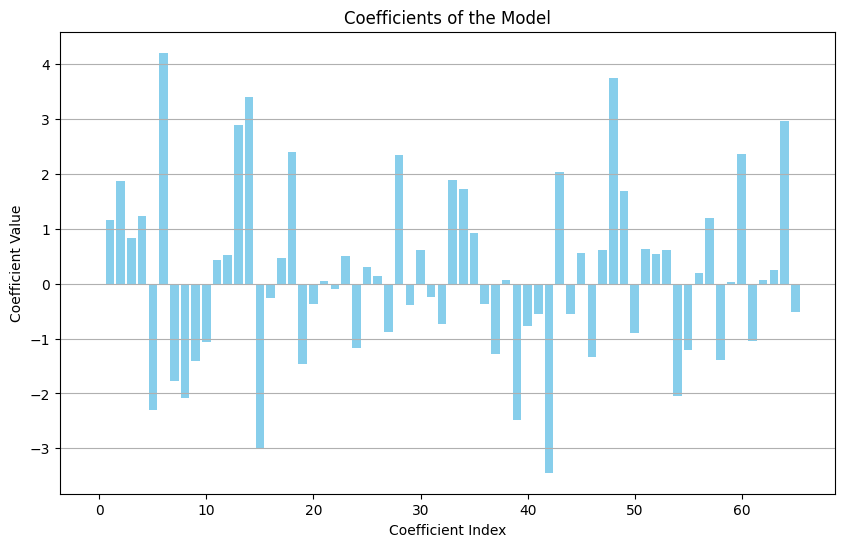

In [11]:
coefficients = model.coef_
indices = np.arange(len(coefficients))
plt.figure(figsize=(10, 6))
plt.bar(indices, coefficients, color='skyblue')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Model')
plt.grid(axis='y')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [12]:
y_pred_train = model.predict(X_train)
r2_train = model.score(X_train, y_train)
mse_train = mean_squared_error(y_train, y_pred_train)

print("R² score on training dataset:", r2_train)
print("Mean Squared Error on training dataset:", mse_train)

R² score on training dataset: 0.8636927695066556
Mean Squared Error on training dataset: 11.841473080000336


Predict the value of "y" for each "x" belonging to the "testing" set

In [13]:
y_pred = model.predict(X_test)
mse_test = mean_squared_error(y_test, y_pred)
r2_test = model.score(X_test, y_test)

print("R² score on test dataset:", r2_test)
print("mean squared error: ", mse_test)

R² score on test dataset: 0.7378221906791418
mean squared error:  19.22649061818431


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [14]:
lasso_model = Lasso(alpha=1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=1)

Get the coefficients of the variables and visualize it.

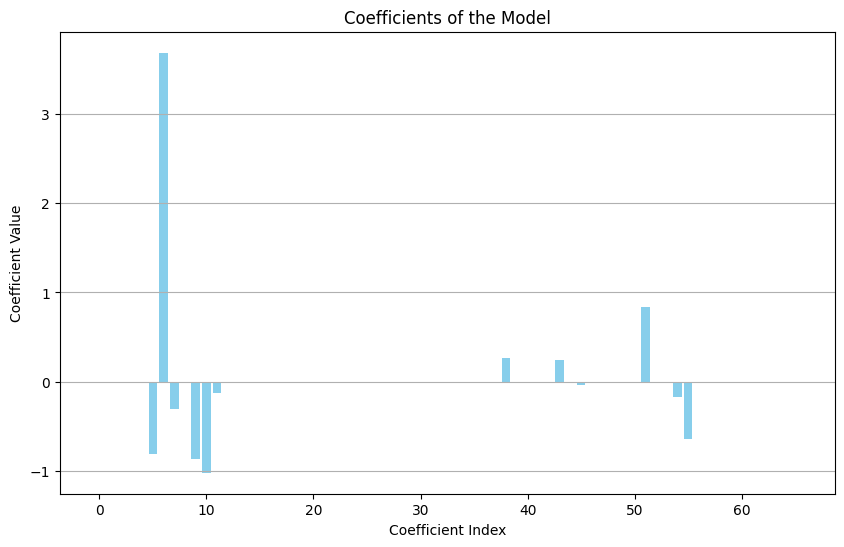

In [15]:
coefficients = lasso_model.coef_
indices = np.arange(len(coefficients))
plt.figure(figsize=(10, 6))
plt.bar(indices, coefficients, color='skyblue')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Model')
plt.grid(axis='y')
plt.show()

**1- What observations can you make about the weight distribution when applying L1 regularization?**<br>
Distribution of our coefficents becomes more sparse. This means L1 norm encourages smaller coefs to be zero. <br>
**2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?**<br>
When alpha is increased, our model is forced to keep only the coefficient with highest value, which is second coef in plot. This is because of nature of the L1 norm, which is equal to the indice with highest absolute value.

Get the score value on train *dataset*


In [16]:
y_pred_train = lasso_model.predict(X_train)
lasso_r2_train = lasso_model.score(X_train, y_train)
lasso_mse_train = mean_squared_error(y_train, y_pred_train)

print("R² score on training dataset:", lasso_r2_train)
print("Mean Squared Error on training dataset:", lasso_mse_train)

R² score on training dataset: 0.6963252353515089
Mean Squared Error on training dataset: 26.38126046318671


Predict the value of "y" for each "x" belonging to the "testing" set

In [17]:
y_pred = lasso_model.predict(X_test)
lasso_mse_test = mean_squared_error(y_test, y_pred)
lasso_r2_test = lasso_model.score(X_test, y_test)

print("R² score on test dataset:", lasso_r2_test)
print("mean squared error: ", lasso_mse_test)

R² score on test dataset: 0.6673274041227333
mean squared error:  24.396140009445226


# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [18]:
ridge_model = Ridge(alpha=1)
ridge_model.fit(X_train, y_train)

Ridge(alpha=1)

Get the coefficients of the variables and visualize it.

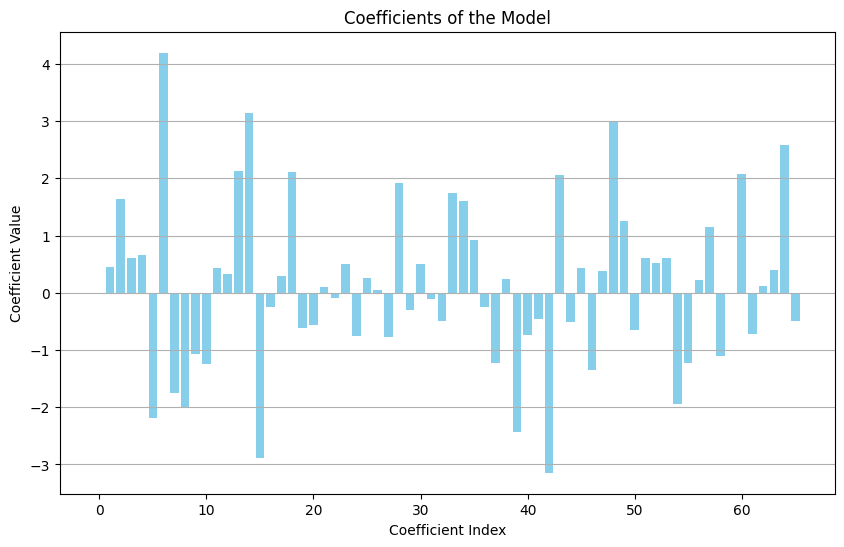

In [19]:
coefficients = ridge_model.coef_
indices = np.arange(len(coefficients))
plt.figure(figsize=(10, 6))
plt.bar(indices, coefficients, color='skyblue')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Coefficients of the Model')
plt.grid(axis='y')
plt.show()

**Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?**<br>
L1 tends to have more sparce weights while concern in L2 is to have weights with smaller magnitude.<br>

**How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?**<br>
In ridge regression by increasing regularization parameter we motivate our model to have weights with lower magnitude, therefore our model ends up with weights closer to zero. This is because sometimes we intend to avoid having very huge weights to avoid complexity or overfitting.

Get the score value on train *dataset*

In [20]:
y_pred_train = ridge_model.predict(X_train)
ridge_r2_train = ridge_model.score(X_train, y_train)
ridge_mse_train = mean_squared_error(y_train, y_pred_train)

print("R² score on training dataset:", ridge_r2_train)
print("Mean Squared Error on training dataset:", ridge_mse_train)

R² score on training dataset: 0.8632896546895098
Mean Squared Error on training dataset: 11.876493036301285


Predict the value of "y" for each "x" belonging to the "testing" set



In [21]:
y_pred = ridge_model.predict(X_test)
ridge_mse_test = mean_squared_error(y_test, y_pred)
ridge_r2_test = ridge_model.score(X_test, y_test)

print("R² score on test dataset:", ridge_r2_test)
print("mean squared error: ", ridge_mse_test)

R² score on test dataset: 0.7424070342097102
mean squared error:  18.890266696889597


# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [22]:
data = {
    'Model': ['Basic Regression', 'Lasso Regression', 'Ridge Regression'],
    'Train RMSE': [mse_train, lasso_mse_train, ridge_mse_train],
    'Test RMSE': [mse_test, lasso_mse_test, ridge_mse_test],
    'Train R² Score': [r2_train, lasso_r2_train, ridge_r2_train],
    'Test R² Score': [r2_test, lasso_r2_test, ridge_r2_test]
}

df = pd.DataFrame(data)
print(df)

              Model  Train RMSE  Test RMSE  Train R² Score  Test R² Score
0  Basic Regression   11.841473  19.226491        0.863693       0.737822
1  Lasso Regression   26.381260  24.396140        0.696325       0.667327
2  Ridge Regression   11.876493  18.890267        0.863290       0.742407


**Which model performed best on the test data?**</br>
Ridge Regression<br><br>
**Why the results on train data are different?**</br>
The differences in performance metrics (e.g., RMSE, R² score) between the basic linear regression, Lasso regression, and Ridge regression models on the training data can be attributed to the regularization techniques used in each model.<br><br>
**Discuss why this might be the case.**<br>
The differences in performance metrics on the training data between basic linear regression, Lasso regression, and Ridge regression can be attributed to the regularization techniques used in each model, which affect the model's complexity and the way it handles multicollinearity and overfitting.